In [ ]:
import os
import shutil
import itertools
import pathlib
from PIL import Image

#Data handling tools
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

#Deep learning libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalAveragePooling2D
#Warningds
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data_path = 'G:/Mahi/brain_mri/T1 3064 blurred/train'

filepaths =[]
labels = []

folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
train_df = pd.concat([Fseries , Lseries] , axis = 1)

In [ ]:
test_data_path = 'G:/Mahi/brain_mri/T1 3064 blurred/test'

filepaths =[]
labels = []

folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path , fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)

#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test_df = pd.concat([Fseries , Lseries] , axis = 1)

In [ ]:
img_size = (224 ,224)
batch_size = 16

tr_gen = ImageDataGenerator()
ts_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)

# valid_gen = ts_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
#                                        class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

test_gen = ts_gen.flow_from_dataframe(test_df , x_col= 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

Found 2451 validated image filenames belonging to 3 classes.
Found 613 validated image filenames belonging to 3 classes.


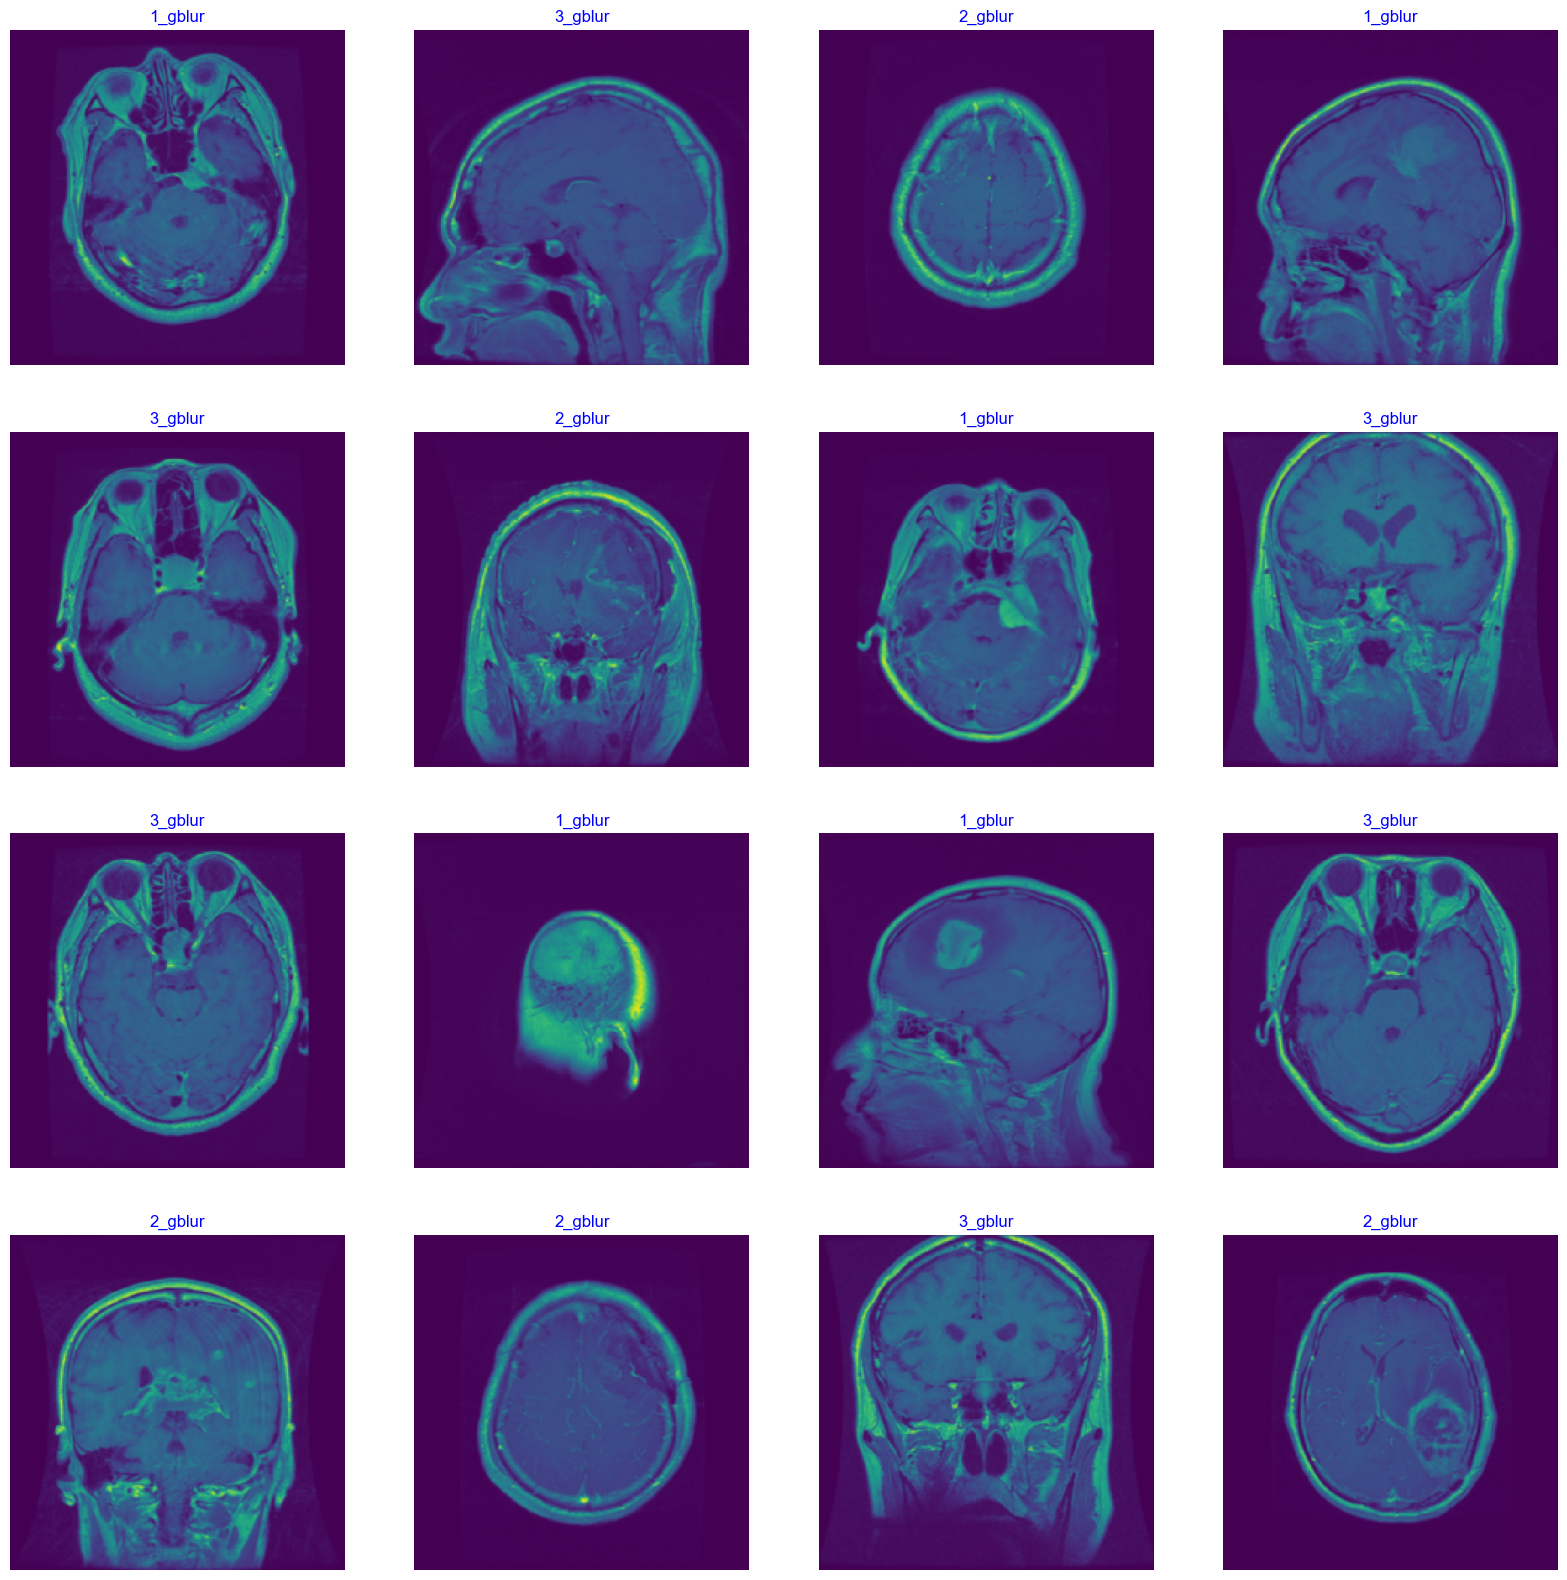

In [ ]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 12)
    plt.axis('off')
plt.show();

In [ ]:
from tensorflow.keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Specify the path to save the best model weights
checkpoint_filepath = 'G:/Mahi/brain_mri/cnn_best_weights93.84.h5'
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)
# Set up the ModelCheckpoint callback to save weights with the highest validation accuracy
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)


In [ ]:
#Best so far95.26
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense
#95.29  besttttttttttttttttttttttttttttttttttt
model2 = Sequential()

# Convolutional layer 1
model2.add(Conv2D(64, (4, 4), activation="relu", input_shape=(224, 224, 1), padding='same'))
model2.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model2.add(BatchNormalization())
#conv2
model2.add(Conv2D(64,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

#Convolutional layer 3
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 4
model2.add(Conv2D(128,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

# Convolutional layer 5
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

 # Convolutional layer 6
model2.add(Conv2D(256,(4,4), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(GlobalAveragePooling2D())

# Full connect layers

model2.add(Dense(units= 1024, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=3, activation='softmax'))

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(),loss="categorical_crossentropy", metrics=['accuracy'])
history = model2.fit(
    x=train_gen ,
    epochs = 100,
    validation_data = test_gen,
    steps_per_epoch=119,
    callbacks=[reduce_lr, model_checkpoint_callback])

Epoch 1/100
119/119 [==============================] - ETA: 0s - loss: 0.7879 - accuracy: 0.6304
Epoch 1: val_accuracy improved from -inf to 0.56444, saving model to G:/Mahi/brain_mri\cnn_best_weights93.84.h5
119/119 [==============================] - 17s 112ms/step - loss: 0.7879 - accuracy: 0.6304 - val_loss: 8.9813 - val_accuracy: 0.5644 - lr: 0.0010
Epoch 2/100
119/119 [==============================] - ETA: 0s - loss: 0.3080 - accuracy: 0.8847
Epoch 2: val_accuracy improved from 0.56444 to 0.74062, saving model to G:/Mahi/brain_mri\cnn_best_weights93.84.h5
119/119 [==============================] - 13s 105ms/step - loss: 0.3080 - accuracy: 0.8847 - val_loss: 2.6188 - val_accuracy: 0.7406 - lr: 0.0010
Epoch 3/100
119/119 [==============================] - ETA: 0s - loss: 0.2377 - accuracy: 0.9223
Epoch 3: val_accuracy did not improve from 0.74062
119/119 [==============================] - 12s 100ms/step - loss: 0.2377 - accuracy: 0.9223 - val_loss: 6.2658 - val_accuracy: 0.6052 - l

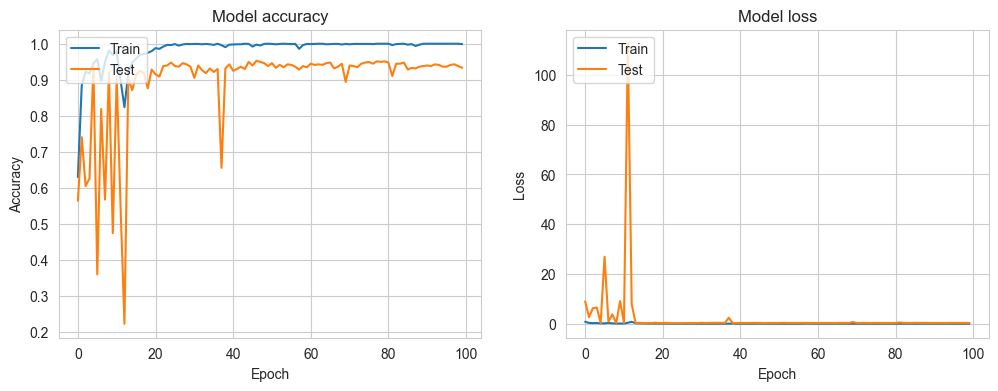

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(test_score)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig('/content/drive/MyDrive/98.55% cnn accuracy.png')
#plt.savefig()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig('/content/drive/MyDrive/98.55% cnn loss.png')
